# Visualisations

In [1]:
import sys
import time
import re
import matplotlib as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline
import cufflinks as cf

* We load the `.csv` files from the Data Preparation Notebook.

In [177]:
merged_df = pd.read_csv('full.csv') # the whole data
gap_df = pd.read_csv('gap.csv')     # GAP citations
pac_df = pd.read_csv('pac.csv')     # GAP Packages citations

* We choose plotting style according to preference.

In [3]:
print(plt.style.available) # prints a list of what we have available

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [4]:
plt.style.use('fivethirtyeight')

### Website

We are starting with simple visualisations. The code below counts the occurances of the two values for the Website column, then displays the result in a horizontal bar chart.

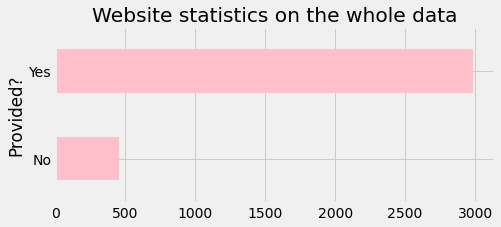

In [5]:
web_chart = merged_df['Website'].value_counts()
web_chart = web_chart.sort_values(ascending=True)
web_chart.plot(kind="barh", figsize=(7, 3),
               title='Website statistics on the whole data', 
                xlabel='Provided?', ylabel='Count', color='pink',
                          )

plt.show()

From approximately 3500 entries in our full dataset, 3000 GAP citations have provided some sort of Website. It is good that the majority of citers have done soe, because the presence of website reference in a software citation is vital, especially when a reader of citing publication wishes to learn more about the software, its versions, releases, price and usage.

Below I created another representation of the same data, this time in a pie chart. Here we do not see the exact count but percentage ratios are displayed in each piece.

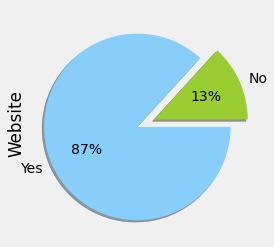

In [6]:
colors = ['yellowgreen', 'lightskyblue']
explode = (0.1, 0.1)
web_chart.plot(kind="pie", colors=colors, shadow=True,
               autopct='%1.0f%%', explode=explode)
plt.show()

Below we have the same type of visualisation but for the two subsets of our data. First is the website statistics for GAP software citations and then for GAP Package citations only. 

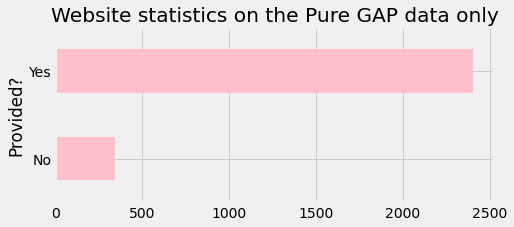

In [7]:
web_gap = gap_df['Website'].value_counts()
web_gap = web_gap.sort_values(ascending=True)
web_gap.plot(kind="barh", figsize=(7, 3),
             title='Website statistics on the Pure GAP data only', 
                xlabel='Provided?', ylabel='Count', color='pink')
plt.show()

GAP Package is based on GAP and sometimes similar, but in reality it is a separate piece of software and as we will see in the raw data Package citations are slightly different. For isntace most of them provide a website reference which is different from the official https://www.gap-system.org/ . Another difference is observed in the versions - most package citations either do not mention version or if they do it is version of the package used, not of the GAP release it is based on.

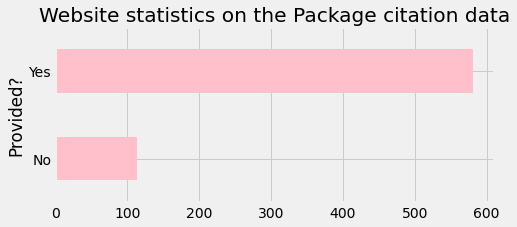

In [8]:
web_pac = pac_df['Website'].value_counts()
web_pac = web_pac.sort_values(ascending=True)
web_pac.plot(kind="barh", figsize=(7, 3),
             title='Website statistics on the Package citation data', 
                xlabel='Provided?', ylabel='Count', color='pink')
plt.show()

* Website statistics by Year, for the full dataset.

From the beginning of data gathering in 1992, to 2001 the number of citations lacking website reference was prevailing. After 2001 we are observing two drastic changes in the data, first the number of citations significantly increases and second most of the new citations provide a website, while the number of those lacking website decreases and remains low.

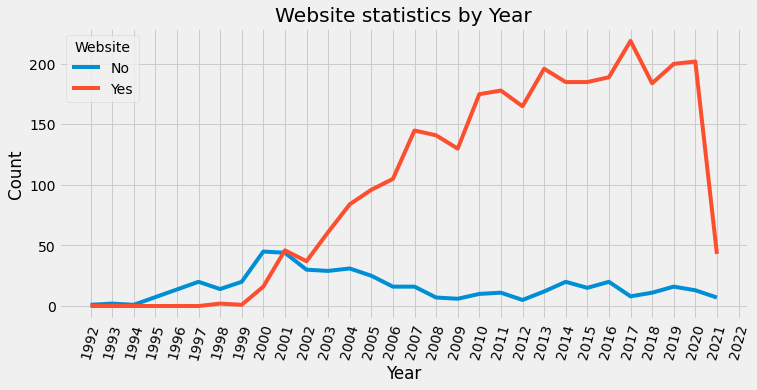

In [9]:
site_year = merged_df.groupby(['Website', 'Year'])['Year'].count().unstack('Website').fillna(0)
site_year_df = pd.DataFrame(data=site_year)
site_year_df.plot(kind='line', ylabel='Count', figsize=(11, 5),
                  title='Website statistics by Year' 
                 )

plt.xticks(np.arange(1992, 2023, 1))
plt.xticks(rotation=75)
plt.show()

Below we can see the same statistics represented in a bar chart.

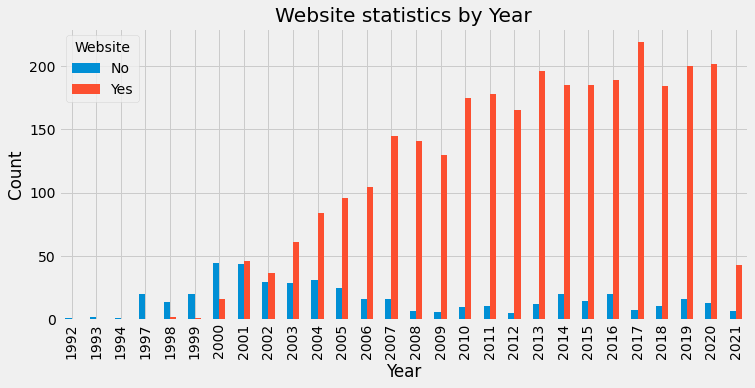

In [10]:
site_year_df.plot(kind="bar", subplots=False, figsize=(11, 5),
                  title='Website statistics by Year', 
                  xlabel='Year', ylabel='Count')
plt.show()

* We can see that in the beginning, up to 2000 the number of citations without a website reference was much higher. Then this trend reverses. On this barchart we can also observe the sharp increase of recorded citations altogether starting from 1997 and reaching a pique in 2017. 

### Length
Here we visualise the `Length` column we created using a Histogram. Most citations are around 110 characters long.

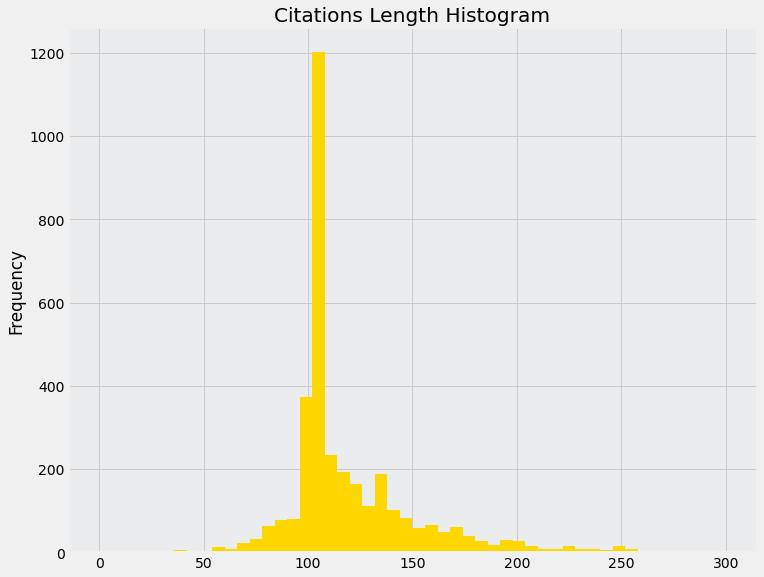

In [15]:
cit_len = merged_df['Length'].plot(kind='hist', bins=50,
                         figsize=(11,9), stacked=True, 
                         #xticks = range(0, 300, 50), 
                         range=(0, 300), 
                         color='gold', 
                         title='Citations Length Histogram', 
                         xlabel="length")
cit_len.set_facecolor('#ebeced')


### Scatter plot displaying length of citations by year.
Here wi seimply plot length by year taken directly from the main dataset. We are using scatterplot because there are too many data points to be displayed otherwise.

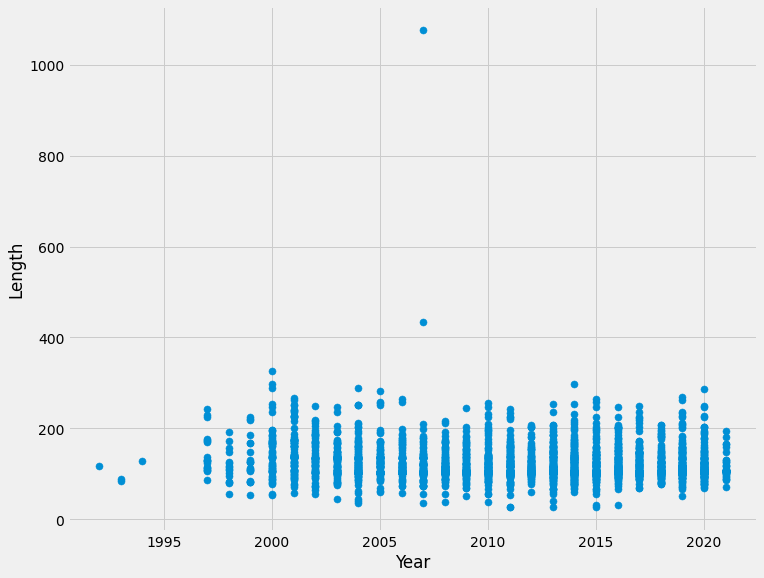

In [19]:
merged_df.plot(kind='scatter', y = 'Length', x = 'Year', figsize=(11,9),
              s=50)
plt.show()

In [20]:
merged_df[merged_df['Length']>400]

,MR,Author,Journal,Year,Publication Type,MSC,Citation,Version,Website,Length,Accuracy Score
272,2299794,"Assmann, B. and Eick, B.",Math. Comp.,2007,article,20F16 (20-04),"The GAP Group. GAP–Groups, Algorithms and Prog...",Unknown,Yes,434,2
758,2351139,"Cameron, P. and Cilleruelo, J. and Serra, O.",Rev. Mat. Iberoam.,2007,article,05D10,"[1] Datskovsky, B. A.: On the number of monoch...",4.3,Yes,1076,3


* We have two outliers, one of them is an error and the other one is citing GAP but mentioning both St Andrews and Braunschweig universities, along with their full contact details, which is making it too long. We will remove these two entries to make the scatter plot more clear.

In [22]:
print(merged_df.iloc[758]['Citation'])
print(merged_df.iloc[272]['Citation'])

[1] Datskovsky, B. A.: On the number of monochromatic Schur triples. Adv.in Appl. Math. 31 (2003), no. 1, 193–198.[2] The GAP Group: GAP —Groups, Algorithms, and Programming, Ver-sion 4.3. Aachen, St Andrews, 2002. www-gap.dcs.st-and.ac.uk/~gap.[3] Graham, R., Rödl, V. and Ruciński, A.: On Schur properties of ran-dom subsets of integers. J. Numb. Theory 61 (1996), no. 2, 388-408.[4] Schoen, T.: The Number of Monochromatic Schur Triples. European J.Combinatorics 20 (1999), no. 8, 855-866.[5] Robertson, A. and Zeilberger, D.: A 2-coloring of [1, N] can have(1/22)N2 + O(N) monochromatic Schur triples, but not less! Electron. J.Combin. 5 (1998), Research Paper 19, 4 pp.Recibido: 23 de noviembre de 2005.Peter CameronSchool of Mathematical SciencesQueen Mary, University of LondonMile End RoadLondon E1 4NS, UKP.J.Cameronqmul.ac.ukJavier CillerueloDepartamento de MatemáticasUniversidad Autónoma de Madrid28049, Madrid, Spainfranciscojavier.cilleruelouam.esOriol SerraDept. Matem`atica Aplicada I

In [23]:
outliers = merged_df[merged_df['Length']>400].index
len_scatter = merged_df.drop(outliers)
len_scatter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3438 entries, 0 to 3439
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   MR                3438 non-null   int64 
 1   Author            3438 non-null   object
 2   Journal           3438 non-null   object
 3   Year              3438 non-null   int64 
 4   Publication Type  3438 non-null   object
 5   MSC               3438 non-null   object
 6   Citation          3438 non-null   object
 7   Version           3438 non-null   object
 8   Website           3438 non-null   object
 9   Length            3438 non-null   int64 
 10  Accuracy Score    3438 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 228.3+ KB


Below is the updated plot. Without the outliers the result is much more "zoomed in" and we can focus and study the data in much more detail.

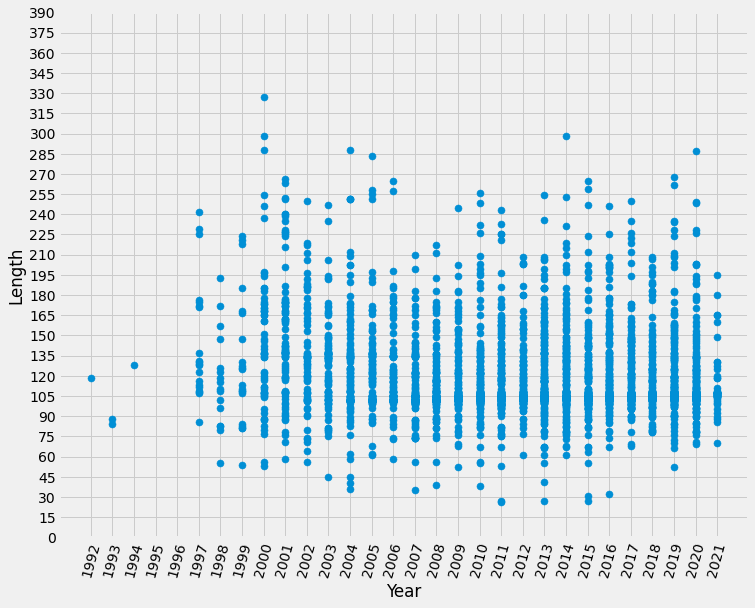

In [29]:
len_scatter.plot(kind='scatter', y = 'Length', x = 'Year', figsize=(11,9),
              s=50, xticks = range(1992, 2022, 1),
              yticks = range(0, 400, 15))
plt.xticks(rotation=75)
plt.show()                       

We observe that the length of citations widely varies during each year. The highest concentration of datapoints is around 105 (citation length) but they range from 30 to 330. Let us investigate the data and find out some more information about the shortest and longest citations.

First we will define a function initially used in the data preparation notebook, so we can display and analyse separate entries from our dataset.

In [31]:
# Python lectures by Dr Konovalov 
# https://studres.cs.st-andrews.ac.uk/CS2006/Lectures/Python/L08-dataset.pdf
# slightly modified so it can return all citations with the specified MRN
# on the other hand the result is a dataframe and if we want to read the full citation text we need to ise `.iloc` with the index
def get_c(mrno):
    r = merged_df[merged_df['MR'] == mrno]
    return r

Then we create two subsets, shorter than 30 characters and longer than 300.

In [32]:
sma = merged_df[merged_df['Length'] < 30]
big = merged_df[merged_df['Length'] > 300]
print(len(sma))
print(len(big))

4
3


In [33]:
sma

,MR,Author,Journal,Year,Publication Type,MSC,Citation,Version,Website,Length,Accuracy Score
3403,3063476,"García Pillado, C. and González, S. and Martín...",J. Algebra Appl.,2013,article,94B60 (20C05 94B25),http://www.gap-system.org/.,Unknown,Yes,27,1
3404,2904286,"Garsia-Pilʹyado, K. and Gonsales, S. and Marko...",Fundam. Prikl. Mat.,2011,article,94B60 (20C05),http://www.gap-system.org/.,Unknown,Yes,27,1
3407,3451663,"Garsia-Pilʹyado, K. and Gonsales, S. and Marko...",Fundam. Prikl. Mat.,2015,article,94A60 (20D99),http://www.gap-system.org/.,Unknown,Yes,27,1
3421,2822510,"Kornyak, V. V.",Zap. Nauchn. Sem. S.-Peterburg. Otdel. Mat. In...,2011,article,81P05,http://www.gap-system.org.,Unknown,Yes,26,1


Afer a quick glance we can easily see that the shortest citations in our records contain simply just the official GAP website and no other information. Another important feature is that 3 out of the 4 are articles by the same group of authors. It seems at the time of citing, these authors were under the impression that providing only a website is good enough. It is a fun fact to note that all the shortest citations even got one accuracy point, by our Accuracy Score calculator, because after all they do mention the GAP website.

In [34]:
big

,MR,Author,Journal,Year,Publication Type,MSC,Citation,Version,Website,Length,Accuracy Score
272,2299794,"Assmann, B. and Eick, B.",Math. Comp.,2007,article,20F16 (20-04),"The GAP Group. GAP–Groups, Algorithms and Prog...",Unknown,Yes,434,2
758,2351139,"Cameron, P. and Cilleruelo, J. and Serra, O.",Rev. Mat. Iberoam.,2007,article,05D10,"[1] Datskovsky, B. A.: On the number of monoch...",4.3,Yes,1076,3
3436,1801202,"Shaw, R.",Des. Codes Cryptogr.,2000,incollection,51E14,"L.H. Soicher, GRAPE: a system for computing wi...",Unknown,Yes,327,2


We can see that the middle one which is over 1000 characters long is just an error along the pipeline - accidentaly all citations of the publication got into the GAP citation text, so we can rule that out.

In [45]:
print(merged_df.loc[758]['Citation'])

[1] Datskovsky, B. A.: On the number of monochromatic Schur triples. Adv.in Appl. Math. 31 (2003), no. 1, 193–198.[2] The GAP Group: GAP —Groups, Algorithms, and Programming, Ver-sion 4.3. Aachen, St Andrews, 2002. www-gap.dcs.st-and.ac.uk/~gap.[3] Graham, R., Rödl, V. and Ruciński, A.: On Schur properties of ran-dom subsets of integers. J. Numb. Theory 61 (1996), no. 2, 388-408.[4] Schoen, T.: The Number of Monochromatic Schur Triples. European J.Combinatorics 20 (1999), no. 8, 855-866.[5] Robertson, A. and Zeilberger, D.: A 2-coloring of [1, N] can have(1/22)N2 + O(N) monochromatic Schur triples, but not less! Electron. J.Combin. 5 (1998), Research Paper 19, 4 pp.Recibido: 23 de noviembre de 2005.Peter CameronSchool of Mathematical SciencesQueen Mary, University of LondonMile End RoadLondon E1 4NS, UKP.J.Cameronqmul.ac.ukJavier CillerueloDepartamento de MatemáticasUniversidad Autónoma de Madrid28049, Madrid, Spainfranciscojavier.cilleruelouam.esOriol SerraDept. Matem`atica Aplicada I

The first citation with index 272 is so long because it mentions the two main bases of GAP, namely University of St Andrews and Universität Braunschweig along with full contact details for both.

In [43]:
print(merged_df.loc[272]['Citation'])

The GAP Group. GAP–Groups, Algorithms and Programming. www.gap-system.org, 2006. Centre for Interdisciplinary Research in Computational Algebra (CIRCA), Univer- sity of St Andrews, North Haugh, St Andrews, KY16 9SS Fife, Scotland E-mail address: bjoernmcs.st-and.ac.uk Institut Computational Mathematics, Fachbereich Mathematik und Informatik, Tech- nische Universität Braunschweig, Braunschweig, Germany E-mail address: beicktu-bs.de


The last citation is for the GRAPE GAP package, but it also refers to a journal including all its details such as name, volume, page etc

In [46]:
print(merged_df.loc[3436]['Citation'])

L.H. Soicher, GRAPE: a system for computing with graphs and groups, in: L. Finkelstein and W.M. Kantor, eds., Groups and Computation, DIMACS Series in Discrete Mathematics and Theoretical Computer Science Vol. 11, AMS, (1993) pp. 287–291. GRAPE is available from http://www-gap.dcs.st-and.ac.uk/gap/Share/grape.html. 
MR1235810


Now we can extend our review and look up citations shorter than 75 characters. Scrolling along the resulting filtered dataset we see that these are mostly citations which mention the software name, along with a website or a version but not both. Others are GAP Package citations mentioning the package name along with its release year and sometimes its specific version.  Looking at the `Author` and `Journal` columns we cannot see any commonly repeating names, therefore we cannot conclude that too long or too short because of the author(s) who created them or the journal they come from.

In [48]:
sma1 = merged_df[merged_df['Length'] < 70]
sma1

,MR,Author,Journal,Year,Publication Type,MSC,Citation,Version,Website,Length,Accuracy Score
21,2726552,"Abdollahi, A. and Khosravi, H.",J. Algebra Appl.,2010,article,20F45 (20F18),"W. Nickel, NQ, 1998, A refereed GAP 4 package,...",Package,No,56,1
28,3297734,"Abdollahi, A.",J. Group Theory,2015,article,20F45,"W. Nickel, NQ, 1998, A refereed GAP 4 package,...",Package,No,55,1
251,2176489,"Ash, A. and Pollack, D. and Sinnott, W.",J. Number Theory,2005,article,11F80,"GAP4, Version: 4.3fix4. Available: http://www....",4.3,Yes,61,2
274,2358616,"Assmann, B. and Linton, S.",J. Algebra,2007,article,20F40 (20F05),"W. Nickel, NQ, 1998, A refereed GAP 4 package,...",Package,No,56,1
348,2864860,"Balagović, M. and Policastro, C.",J. Pure Appl. Algebra,2012,article,16S99 (16D90 16G10 16Z05 20C08),"J. Michel, GAP Manual http://www.math.jussieu....",Unknown,Yes,61,1
353,3092787,"Ballester-Bolinches, A. and Cosme-Llópez, E. a...",Cent. Eur. J. Math.,2013,article,20D10 (20D20),"The GAP Group, GAP–Groups, Algorithms, Program...",4.5.7,No,66,1
648,3985485,"Breuer, T. and Hiss, G. and Lübeck, F. and Lux...",Math. Comp.,2019,article,20C20 (20-08 20C33),"L. Maas and F. Noeske, moc, MOC for GAP, unr...",Package,No,66,1
880,2242478,"Chesnokov, A. A. and Haemers, W. H.",Linear Algebra Appl.,2006,article,05C50,"GAP—Groups, Algorithms and Programming, Versio...",4.3,No,58,1
884,2824088,"Chossat, P. and Faye, G. and Faugeras, O.",J. Nonlinear Sci.,2011,article,37L10 (35K25 35K58 37G40 37N25 92C20),"GAP: Groups, algorithms and programming, http:...",Unknown,Yes,67,1
1004,3080203,"Daoud, B. and Hamitouche, M. and Merikhi, K.",Mediterr. J. Math.,2013,article,20F18,"W. Nickel, NQ, 1998, A refereed GAP 4 package....",Package,No,55,1


In [55]:
print(merged_df.loc[880]['Citation'])
print(merged_df.loc[2240]['Citation']) 

GAP—Groups, Algorithms and Programming, Version 4.3, 2002.
M. Ringe. The C Meat-Axe, GAP package (1993).


### Version

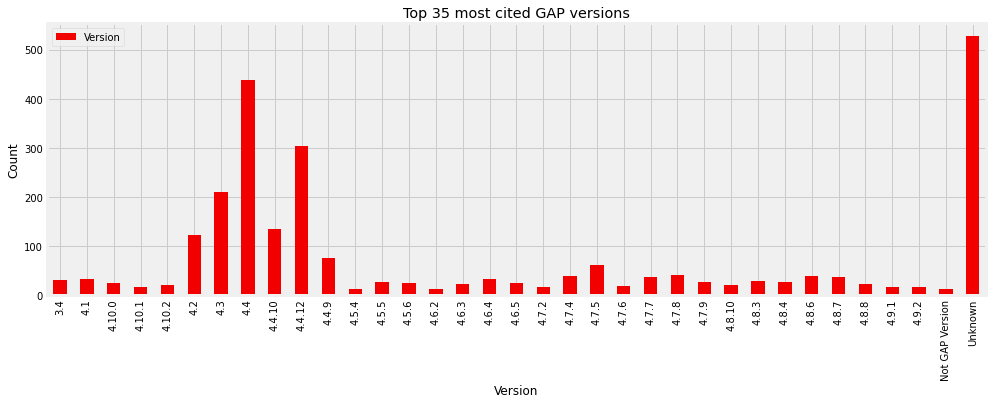

In [179]:
ver = gap_df['Version'].value_counts()
ver = ver.head(35)
ver = ver.to_frame()
ver = ver.sort_index()
ver = ver.dropna()
ver.plot(kind="bar", figsize=(15, 5), title='Top 35 most cited GAP versions',
         xlabel='Version', 
         ylabel='Count', color='#f20000')
plt.show()

* In this bar chart we can see that the most popular GAP versions cited are subversions of GAP 4, between 4.2 and 4.4

### Interactive chart displaying number of records for each version for selected Year.

In [181]:
ver_list = gap_df['Version'].unique()
years_list = gap_df['Year'].unique()
years_list = np.sort(years_list)[::-1] #sort the NumPy array in descending order
#years_list

In [182]:
ver_list

array(['Unknown', '4.7.5', '4.4.12', '4.7.8', '4.3', '4.4', '4.4.4',
       '4.6.4', '4.7.2', '4.6.5', '4.7.9', '4.8.8', '4.8.9', '4.4.10',
       '4.5.7', '4.7.4', '4.7.7', '4.2', '4.6.12', '4.1', '4.10.0',
       '4.8.6', '4.8.2', '4.10.2', '4.11.0', '4.4.2', '4.8.3',
       'Not GAP Version', '4.8.7', '4.6', '2.12', '4.9.1', '4.4.9',
       '4.8.4', '4.6.2', '1.2', '4.9.3', '4.8.10', '4.5', '4.4.6',
       '4.4.7', '4.5.5', '1.4', '1.3.3', '4.4.11', '5.7', '1.5.4',
       '4.10.1', '1.0.0', '4.6.3', '1.1', '3.4', '4.8.5', '4.5.6', '4.11',
       '4.10', '4.9.2', '4.7.6', '4.6.9', '4.5.4', '3.4.4', '4.8',
       '4.9.0', '4.7', '3.3', '2.19', '0.97', '1.2.1', '2.2.0', '1.5.1',
       '3.0', '2.0.0', '4.5.3', '2.1.0', '3.1.0', '3.4.3', '1.0', '4.6.1',
       '4.4.3', '4.8.1', '1.9.6', '3.1', '4.4.5', '1.4.0', '4.46', '4.9',
       '4.49', '3.2'], dtype=object)

In [184]:
@interact
def ver_by_year(Year=years_list):
    to_plot = gap_df[gap_df['Year']==Year]
    ver = to_plot['Version'].value_counts()
    #ver = ver.head(35)
    ver = ver.to_frame()
    ver = ver.sort_index()
    ver = ver.dropna()
    ver.plot(kind="bar", figsize=(15, 5),
             title='Cited GAP version for selected year',
             xlabel='Version', 
             ylabel='Count', color='#f20000')
    return plt.show()



interactive(children=(Dropdown(description='Year', options=(2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 20…

The trend that we observe here is that in the yearly years very few GAP versions were cited, simply because not many existed yet. Later on after 2000 the number of different cited versions starts growing noticably, because authors were citing the GAP version they used, which was not necessarily the latest version. As we have seen in the previous chart the most popular GAP versions are between 4.2 and 4.4 <br>
Another peculiarity we can find by looking at the years between 2010 and 2020 where we will find a wide variety of versions cited. This tells us that in the GAP community there was no unison or collective notion regarding what is the best version or what is the latest available version. On the other hand, different versions might be better suited for different purposes, we can never know for certain unless we study cases one by one. After we have seen data for all these years, we switch to 2021, the last available year in our dropdown list and suddenly we see a much clearer picture - all cited versions are between 4.1 and 4.9. This might be happening for several reasons
* older versions being discontinued in 2021
* general announcement on the official website and/or GAP community pages
* we are still onyl half-way into 2021 and we do not have the whole data yet - after the year ends, older version citations might appear in the data.

<br>
This interactive tool can be useful, not just for GAP but for any other software. It can be employed to analyse numbers of cited versions for different years and draw conclusions.

### Authors

* Top 20 authors citing GAP and its packages in their work.

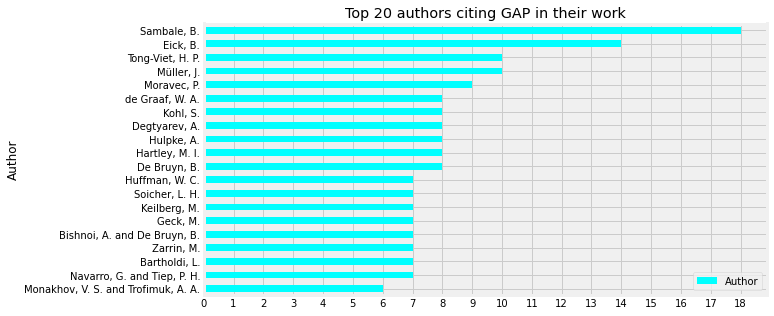

In [100]:
authors = gap_df['Author'].value_counts()
top = authors.head(20)
top = top.sort_values(ascending=True)
top = top.to_frame()
chart = top.plot(kind="barh",
                 figsize=(9,5), title='Top 20 authors citing GAP in their work', 
                 xlabel='Author', 
                 ylabel='Count', color='cyan', 
                  xticks=range(0, 19, 1))
# how do we treat joint papers ?

* Top 20 authors citing GAP Packages

In [101]:
author = pac_df['Author'].value_counts()
top20 = author.head(20)
top20 = top20.sort_values(ascending=False)
top20 = top20.to_frame()
top20

#chart = top20.plot(kind="bar",
#                 figsize=(9,5), title='Top 20 authors citing GAP Packages', 
#                 xlabel='Author', 
#                 ylabel='Count', color='brown', 
#                  xticks=range(0, 19, 1))

,Author
"Bächle, A. and Margolis, L.",10
"Koshitani, S. and Müller, J. and Noeske, F.",10
"Soicher, L. H.",8
"Eick, B.",7
"Kohl, S.",6
"Eick, B. and Horn, M.",6
"Douglas, A. and Repka, J.",6
"Linton, S. and Hammond, K. and Konovalov, A. and Brown, C. and Trinder, P. W. and Loidl, H. -. and Horn, P. and\nRoozemond, D.",5
"Fernandes, V. H.",5
"Assmann, B. and Eick, B.",5


### Year

##### Barchart dislaying number of GAP citations per year, with the bars sorted chronologically.

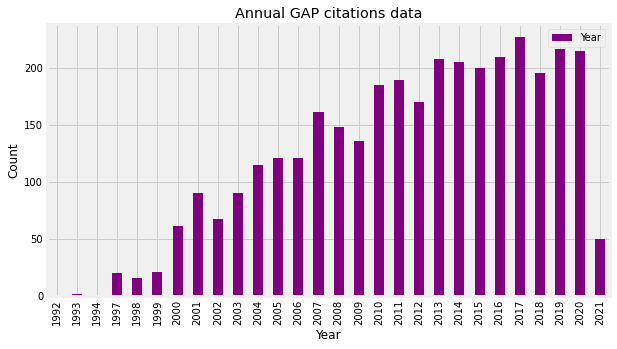

In [105]:
year_chrono = merged_df['Year'].value_counts()
chrono_df = year_chrono.to_frame()
chrono = chrono_df.sort_index()
chrono.plot(kind="bar", figsize=(9, 5), title='Annual GAP citations data', xlabel='Year', 
                ylabel='Count', color='purple')
plt.show()

After looking at the chart we can see that the amount of GAP citations was relatively small upto 1999 and from 2000 onwards its started growing steady to reach around 200 per year in 2013. From there on it kept that level with around 250 in 2017 and 190 in 2018. The data for 2021 is still incomplete. We can conclude that GAP's popularity started to grow in the year of 2000.

### Top 20 journals citing GAP, for selected dataset.
* Users can choose to see top 20 journals for the full data, for the GAP citations only or just for GAP Package citations.

In [109]:
df_list = ['Full Data', 'GAP Data', 'Package Data']

In [110]:
@interact
def jour_df_selector(Dataset = df_list):
    if Dataset == 'GAP Data':
        top_journals = gap_df['Journal'].value_counts()
        top_20 = pd.DataFrame(top_journals.head(20))
        top_20 = top_20.reset_index()
        top_20.columns=['Journal', 'Citations count']
        return top_20
    if Dataset == 'Full Data':
        top_journals = merged_df['Journal'].value_counts()
        top_20 = pd.DataFrame(top_journals.head(20))
        top_20 = top_20.reset_index()
        top_20.columns=['Journal', 'Citations count']
        return top_20
    if Dataset == 'Package Data':
        top_journals = pac_df['Journal'].value_counts()
        top_20 = pd.DataFrame(top_journals.head(20))
        top_20 = top_20.reset_index()
        top_20.columns=['Journal', 'Citations count']
        return top_20


interactive(children=(Dropdown(description='Dataset', options=('Full Data', 'GAP Data', 'Package Data'), value…

"J. Algebra" is the leader in all 3 charts with highest number of GAP citations. The top 5 are the same for Full data and GAP data with just 4th and 5th beign reversed. <br>
The top 5 for the Package citations is entirely different however, because GAP packages are cited by different journals and books.

### Top 20 Journals citing GAP for selected time period
* Using this tool we can filter the data we have at our disposal and discover tendencies in citing GAP software over the years.
For instance if we use `Up to` operator with the year of 1998 we will notice firstly that very few records are available and secondly they arem ostly British and American, with one Japanese journal. Then if we start increasing the year gradually, keeping the same operator, we will observe the appearance of new journal names from various countries around the world, such as France, Turkey, Switzerland, Russia, Israel and some international too.

In [121]:
@interact
def jou_by_year(Year=years_list, 
                Operator=['Up to', 'For this year', 'After']):
    column='Year'
    if Operator == 'For this year':
        to_plot = merged_df[merged_df[column] == Year]
        top_journals = to_plot['Journal'].value_counts()
        top_20 = pd.DataFrame(top_journals.head(20))
        top_20 = top_20.reset_index()
        top_20.columns=['Journal', 'Citations count']
        return top_20      
    if Operator == 'Up to':
        to_plot = merged_df[merged_df[column] <= Year]
        top_journals = to_plot['Journal'].value_counts()
        top_20 = pd.DataFrame(top_journals.head(20))
        top_20 = top_20.reset_index()
        top_20.columns=['Journal', 'Citations count']
        return top_20 
    if Operator == 'After':
        to_plot = merged_df[merged_df[column] > Year]
        top_journals = to_plot['Journal'].value_counts()
        top_20 = pd.DataFrame(top_journals.head(20))
        top_20 = top_20.reset_index()
        top_20.columns=['Journal', 'Citations count']
        return top_20  

interactive(children=(Dropdown(description='Year', options=(2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 20…

In [134]:
merged_df.columns

Index(['MR', 'Author', 'Journal', 'Year', 'Publication Type', 'MSC',
       'Citation', 'Version', 'Website', 'Length', 'Accuracy Score'],
      dtype='object')

### Top 15 GAP citing Journals ordered by their average `delay`
* The delay column reflects the difference between the publication date and the release date of the cited GAP version (in years). This difference might be considered as delay in recognizing/picking up/ new GAP releases or it could just be personal preference of publication authors to older GAP releases.
<br>For this table I am using `gap_df` dataset, because GAP versions do not apply to GAP Packages, they have their own version systems.

In [141]:
jou_year = gap_df.groupby(['Journal'])['Delay'].mean()
jou_year = pd.DataFrame(data=jou_year)
jou_year = jou_year.sort_values(by='Delay', ascending=False)
jou_year.head(15)

,Delay
Journal,
Bull. Inst. Math. Acad. Sin. (N.S.),14.000000
Vietnam J. Math.,11.000000
J. Inst. Math. Jussieu,10.000000
Ergodic Theory Dynam. Systems,9.500000
Bull. Belg. Math. Soc. Simon Stevin,8.600000
Kyoto J. Math.,8.000000
Dissertationes Math.,8.000000
Adv. Geom.,7.777778
Math. Slovaca,7.500000


### The most frequent type of work citing GAP
* Looking at the data, it seems GAP is predominantly cited in articles - 3393 times. In the raw data there were several other publication types present, such as `book` `phdthesis` and `mastersthesis`, but they were filtered out durign the data cleaning process, simply because their entries had missing information in too many important columns, making them unfeasible for our further data analysis.

In [142]:
types_pub = pd.DataFrame(merged_df['Publication Type'].value_counts())
types_pub.columns = ['GAP Citations Count']
types_pub.index.names = ['Publication Type']
types_pub

,GAP Citations Count
Publication Type,
article,3393
incollection,43
inproceedings,4


### Interactive table, displaying publication types breakdown for selected year.

In [144]:
@interact
def jou_by_year(Year=years_list):
    to_plot = merged_df[merged_df['Year'] == Year]['Publication Type'].value_counts()
    to_plot = pd.DataFrame(data=to_plot)
    to_plot.columns = ['GAP Citations Count']
    to_plot.index.names = ['Publication Type']
    return to_plot


interactive(children=(Dropdown(description='Year', options=(2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 20…

### Accuracy

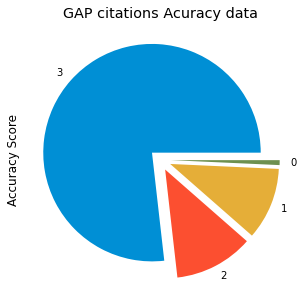

In [146]:
acc = merged_df['Accuracy Score'].value_counts()
acc.plot(kind="pie", figsize=(5, 5), title='GAP citations Acuracy data',
         xlabel='Score', 
         explode=(0.1, 0.1, 0.1, 0.1))
plt.show()

* Annual average of Accuracy sores

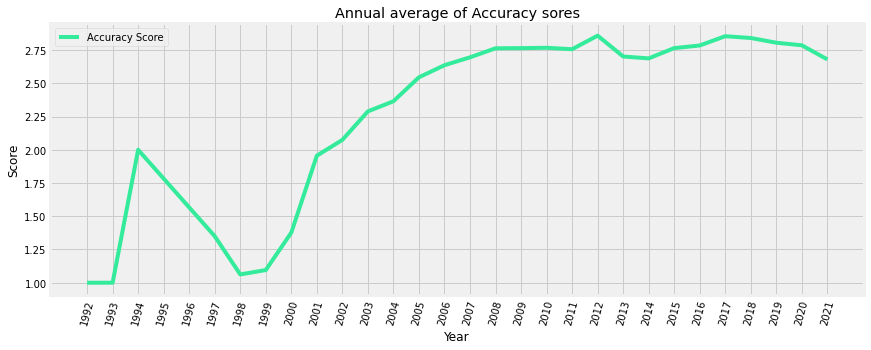

In [150]:
ttt = merged_df.groupby('Year')['Accuracy Score'].mean()
ttt = pd.DataFrame(data=ttt)
ttt.plot(kind='line', figsize=(13, 5),
         title='Annual average of Accuracy sores',
         xlabel='Year', ylabel='Score', color='#34eb9b')
plt.xticks(range(1992, 2022, 1))
plt.xticks(rotation=75)
plt.show()

In the line chart above we observe a spike in the Accuracy in 1993-4 then it falls again between 1995 and 1999. From there it starts rising again, to reach the maximum of 3 in late 2007. This level is kept until today.

### Releases by year

We will use `gap_df` containing only GAP citations with versions provided, all other entries such as Package citations cannot be used in this part of the analysis because they do not have GAP Versions as such.

In [152]:
versions_cited = gap_df['Version'].unique()

In [154]:
versions_cited

array(['Unknown', '4.7.5', '4.4.12', '4.7.8', '4.3', '4.4', '4.4.4',
       '4.6.4', '4.7.2', '4.6.5', '4.7.9', '4.8.8', '4.8.9', '4.4.10',
       '4.5.7', '4.7.4', '4.7.7', '4.2', '4.6.12', '4.1', '4.10.0',
       '4.8.6', '4.8.2', '4.10.2', '4.11.0', '4.4.2', '4.8.3', '10.1109',
       '4.8.7', '4.6', '2.12', '4.9.1', '4.4.9', '4.8.4', '4.6.2', '1.2',
       '4.9.3', '4.8.10', '4.5', '4.4.6', '4.4.7', '4.5.5', '1.4',
       '1.3.3', '4.4.11', '5.7', '1.5.4', '4.10.1', '1.0.0',
       '4.4.10.2007', '4.6.3', '1405.5063', '1.1', '3.4', '4.8.5',
       '4.5.6', '4.11', '4.10', '4.9.2', '4.7.6', '4.6.9', '4.5.4',
       '3.4.4', '4.08.10', '0710.3267', '0911.5589', '4.8', '4.9.0',
       '4.7', '3.3', '2.19', '0.97', '10.14760', '1.2.1', '2.2.0',
       '1.5.1', '3.0', '2.0.0', '4.4.2006', '4.5.3', '2.1.0', '3.1.0',
       '3.4.3', '1.0', '55.0810.04', '4.6.1', '4.4.3', '4.8.1', '1.9.6',
       '1804.09707', '3.1', '4.4.5', '1.4.0', '4.46', '4.9', '4.49',
       '10.01.16', '3.2'], dtype

* Number of Citations by year of cited GAP release, in textual and graphic forms.
The table is sorted by citation count in descending order.

In [176]:
rel_years = gap_df['ReleaseYear'].value_counts()
rel_years = pd.DataFrame(data=rel_years)
rel_index = rel_years.index
rel_years.columns=['Count']
#rel_years = rel_years.index.names = ['ReleaseYear']
rel_years

,Count
Unknown,930
2004,449
2008,307
2002,211
2007,135
2000,122
2014,120
2013,112
2015,105
2006,86


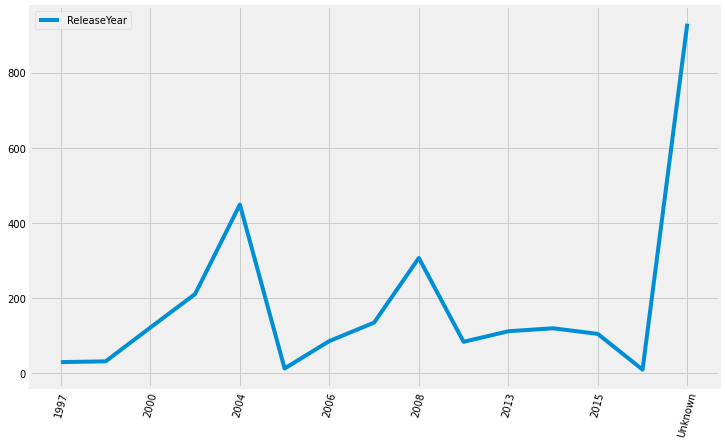

In [170]:
rel_years = rel_years.sort_index()
rel_years.plot(figsize=(11, 7))
plt.xticks(rotation=75)
plt.show()

### Types of GAP citing publications by year.
* Articles are the dominating type.

In [ ]:
gap_df['Publication Type'].value_counts()

In [ ]:
yea = gap_df.groupby(['Publication Type', 'Year'])['Publication Type'].count().unstack('Publication Type').fillna(0)
yea = pd.DataFrame(data=yea)
#yea

In [ ]:
yea.plot(kind="bar", subplots=False,  
                figsize=(11, 5), title='Citations by year of cited GAP release', xlabel='Years', 
                ylabel='Count')

# Delay in picking up new GAP releases
* Column `delay` = release year - year values. Some `ReleaseYear` cells contain `Unknown` hence we have 1816 entries to work with on this query, which is enought to get a good notion of the trends.

In [ ]:
gap_df[gap_df['ReleaseYear'] != 'Unknown'].count()

Below is the data in graphical form. The longest delays on record are 17 and 18 years but we only have a few such cases. There is one negative values, but it will not affect our visualisation.

In [ ]:
tail = gap_df['Delay'].value_counts()
tail = pd.DataFrame(data=tail)
tail = tail.sort_index(ascending=False)
tail

There is one negative value, but it will not affect the general results.

In [ ]:
gap_df.loc[gap_df['Delay'] < 0]

In [ ]:
tail.plot(kind="bar", subplots=True,  
                figsize=(11, 7), title='Delay in picking up new GAP releases', xlabel='Delay in years', 
                ylabel='Count', color='#fa00d9')

plt.show()

In [ ]:
# reverse it x

More than half of the entries have 0 delay which means GAP versions were cited during the same year they were released. Amongst the entries with positive delay those with 1 to 6 years delay are most common with 3 years being the most frequent.

# Interactive

### Dataset timeline filter 

In [ ]:
years_list = gap_df['Year'].unique()
years_list = np.sort(years_list)[::-1] #sort the NumPy array in descending order
#years_list

In [ ]:
# Interact with specification of arguments
@interact
def period_selector(Year=years_list, 
                            operator=['Up to', 'For this year', 'After']):
    column='Year'
    if operator == 'For this year':
        return gap_df.loc[gap_df[column] == Year]
    if operator == 'Up to':
        return gap_df.loc[gap_df[column] <= Year]
    if operator == 'After':
        return gap_df.loc[gap_df[column] > Year]

### Interactive pie chart displaying accuracy scores ratio for selected year

In [ ]:
@interact
def released_year_selector(Year = years_list):
    description='Select Year:'
    to_plot = merged_df[merged_df['Year'] == Year]
    to_plot = to_plot['Accuracy Score'].value_counts()
    return to_plot.plot(kind="pie", figsize=(5, 5), title='Annual GAP citations Acuracy data', xlabel='Score', 
                )

### Version breakdown by year

In [ ]:
@interact
def released_year_selector(Year = years_list):
    description='Select Year:'
    to_plot = gap_df[gap_df['Year'] == Year]
    to_plot = to_plot.groupby(['Version', 'Year'])['Version'].count().unstack('Version').fillna(0)
    return to_plot.plot(kind="bar", figsize=(15, 11),
                        title='GAP versions cited by year')
#    plt.legend(prop={'size': 19})
#    plt.show()

### Interactive bar chart displaying website statistics by year

In [ ]:
@interact
def period_selector(Year=years_list, operator=['Up to', 'For this year', 'After']):
    column='Year'
    if operator == 'For this year':
        site_year = gap_df.loc[gap_df[column] == Year]
        site_year = site_year.groupby(['Website', 'Year'])['Year'].count().unstack('Website')
        site_year_df = pd.DataFrame(data=site_year)
        return site_year_df.plot(kind="bar", subplots=False, figsize=(11, 5),
                  title='Website statistics by Year', 
                  xlabel='Year', ylabel='Count')
    if operator == 'Up to':
        site_year = gap_df.loc[gap_df[column] <= Year]
        site_year = site_year.groupby(['Website', 'Year'])['Year'].count().unstack('Website')
        site_year_df = pd.DataFrame(data=site_year)
        return site_year_df.plot(kind="bar", subplots=False, figsize=(11, 5),
                  title='Website statistics by Year', 
                  xlabel='Year', ylabel='Count')
    if operator == 'After':
        site_year = gap_df.loc[gap_df[column] > Year]
        site_year = site_year.groupby(['Website', 'Year'])['Year'].count().unstack('Website')
        site_year_df = pd.DataFrame(data=site_year)
        return site_year_df.plot(kind="bar", subplots=False, figsize=(11, 5),
                  title='Website statistics by Year', 
                  xlabel='Year', ylabel='Count')

* Filter the citations data by year

### Interactive bar chart allowing user to select a publication year and then displaying numbers of GAP releases cited grouped in separate bars for each release year.

In [ ]:
# we exclude entries with Unknown release year.
filtered_df = gap_df[gap_df['ReleaseYear'] != 'Unknown'] 

df3 = filtered_df.groupby(['Year', 'ReleaseYear'])['MR'].count().unstack('Year').fillna(0)
#df3.head()
#df3.iloc[0].plot.pie(subplots=False, legend=False, figsize=(15, 11))
#df3[2000]

In [ ]:
@interact
def year_selector(Year=years_list):
    description='Select Year:'
    to_plot = df3[Year]
    return to_plot.plot.bar(figsize=(5, 5), 
                            title='Number of citations by Release Year for selected Year')

### Interactive bar chart allowing user to select Release Year and see the number of citations grouped in bars - one for each Publication year

* First we create a list of all Release years, sorted in descending order.

In [ ]:
rel_list = filtered_df['ReleaseYear'].unique()
rel_list = np.sort(rel_list)
#rel_list = rel_list.astype(int)
rel_list = np.sort(rel_list)[::-1]
#rel_list

* Then we filter the data and create a new daraframe with a column for each Release year and a row for each year of publication with publication count in every intersecting cell.

In [ ]:
df5 = filtered_df.groupby(['ReleaseYear', 'Year'])['MR'].count().unstack('ReleaseYear').fillna(0)
#df5.tail(11)
#df5.index
#df5[df5['ReleaseYear'] == 1997]
#df5.columns
#df5['2000']
#df5.iloc[7].plot.pie(subplots=False, legend=False, figsize=(15, 11))

* FInally we visualise it, allowing users to select Release Year.

In [ ]:
@interact
def released_year_selector(ReleaseYear = rel_list):
    description='Select Release Year:'
    to_plot1 = df5[ReleaseYear]
    return to_plot1.plot.bar(figsize=(7, 7), title='Number of citations by Year for selected Release Year')

### MSC Areas

### MSC Codes
* Looking at the `MSC` column we will only analysethe primary MSC codes, therefore we will keep the first 5 symbols only.

In [ ]:
for index, row in merged_df.iterrows():
    print(row['MSC'])

In [ ]:
merged_df['MSC Primary'] = [x[:5] for x in merged_df['MSC']]
merged_df['MSC Secondary'] = [x[5:] for x in merged_df['MSC']]

In [ ]:
merged_df['MSC Primary'].head()

In [ ]:
merged_df['MSC Secondary'].head()

* Now we need the science area names corresponding to each MSC code.
* First we create the dictionary, using this PDF https://mathscinet.ams.org/msnhtml/msc2020.pdf

In [ ]:
msc_text = """00 General and overarching topics; collections
01 History and biography
03 Mathematical logic and foundations
05 Combinatorics
06 Order, lattices, ordered algebraic structures
08 General algebraic systems
11 Number theory
12 Field theory and polynomials
13 Commutative algebra
14 Algebraic geometry
15 Linear and multilinear algebra; matrix theory
16 Associative rings and algebras
17 Nonassociative rings and algebras
18 Category theory; homological algebra
19 K-theory
20 Group theory and generalizations
22 Topological groups, Lie groups
26 Real functions
28 Measure and integration
30 Functions of a complex variable
31 Potential theory
32 Several complex variables and analytic spaces
33 Special functions
34 Ordinary differential equations
35 Partial differential equations
37 Dynamical systems and ergodic theory
39 Difference and functional equations
40 Sequences, series, summability
41 Approximations and expansions
42 Harmonic analysis on Euclidean spaces
43 Abstract harmonic analysis
44 Integral transforms, operational calculus
45 Integral equations
46 Functional analysis
47 Operator theory
49 Calculus of variations and optimal control; optimization
51 Geometry
52 Convex and discrete geometry
53 Differential geometry
54 General topology
55 Algebraic topology
57 Manifolds and cell complexes
58 Global analysis, analysis on manifolds
60 Probability theory and stochastic processes
62 Statistics
65 Numerical analysis
68 Computer science
70 Mechanics of particles and systems
74 Mechanics of deformable solids
76 Fluid mechanics
78 Optics, electromagnetic theory
80 Classical thermodynamics, heat transfer
81 Quantum theory
82 Statistical mechanics, structure of matter
83 Relativity and gravitational theory
85 Astronomy and astrophysics
86 Geophysics
90 Operations research, mathematical programming
91 Game theory, economics, social and behavioral sciences
92 Biology and other natural sciences
93 Systems theory; control
94 Information and communication, circuits
97 Mathematics education"""

In [ ]:
msc_dict = {l[:2]: l[3:] for l in msc_text.splitlines()}
msc_dict

* Processing the Primary column. We will need the first two digits of each MSC code only, so we can map it to our dictionary and convert it to a science area name.

In [ ]:
merged_df['MSC Primary'] = [x[:2] for x in merged_df['MSC Primary']]
merged_df["MSC Primary"] = merged_df["MSC Primary"].map(msc_dict)
merged_df["MSC Primary"].head()

* Processing the Secondary column. First we apply a Regex expression which strips all unnecessary characters, then takes the first two characters of each word. Then we map the results to our dictionary. Finally we use `.groupby(level=0).agg(list)` to group the Series by index and put them back into lists.

In [ ]:
merged_df["MSC Secondary"] = (
    merged_df["MSC Secondary"]
    .str.extractall(r"[ \(](\w{2})")[0]
    .map(msc_dict)
    .groupby(level=0).agg(list)
)

* We check the data type for the column and the amount of `NaN` values.

In [ ]:
type(merged_df["MSC Secondary"][1])

In [ ]:
merged_df["MSC Secondary"].isnull().values.sum()

* First we fill ne `NaN` cells with the string `No`. Then we can use `lambda` with `pd.unique` to remove duplicates.

In [ ]:
merged_df["MSC Secondary"] = merged_df["MSC Secondary"].fillna('No')
merged_df["MSC Secondary"] = merged_df["MSC Secondary"].apply(lambda x: list(pd.unique(x)))
merged_df["MSC Secondary"].head(3)

In [ ]:
type(merged_df["MSC Secondary"][1])

* We will create a new dataframe solely for MSC Areas statistics.

In [ ]:
msc_df = merged_df["MSC Primary"].value_counts()
msc_df = msc_df.to_frame()
msc_df = msc_df.reset_index()
msc_df.columns = ['MSC Area', 'Primary Count']
msc_df.head()

* And we add the other coulmn which counts each occurance of an MSC area as Secondary in our main dataframe `merged_df`.

In [ ]:
msc_df['Secondary Count'] = [merged_df['MSC Secondary'].str.count(x).sum() for x in msc_df['MSC Area']]

In [ ]:
msc_df.head()

* We add another column reflecting the MSC Areas which are only in Secondary but not Primary (in the same row).

* Using`.explode` to further analyse the `MSC Secondary` column.

In [ ]:
kin = merged_df.explode('MSC Secondary')
kin

* This is how we count the occurences of MSC Area as secondary, in our GAP citations dataset.

In [ ]:
kin['MSC Secondary'].iloc[1]

In [ ]:
kin['MSC Secondary'].str.count("Combinatorics").sum()

In [ ]:
msc_df_sec = kin[kin['MSC Primary'] != kin['MSC Secondary']]
msc_df_sec = msc_df_sec[msc_df_sec['MSC Secondary'] != 'No']

In [ ]:
sec = msc_df_sec['MSC Secondary'].value_counts()
sec_df = pd.DataFrame(data=sec)
sec_df = sec_df.reset_index()
sec_df.columns = ['MSC Area', 'Only As Secondary']
sec_df

In [ ]:
new_msc_df = pd.merge(msc_df, sec_df, on='MSC Area', how='left', indicator=True)

In [ ]:
new_msc_df = new_msc_df.drop(columns="_merge")
new_msc_df['Only As Secondary'] = new_msc_df['Only As Secondary'].fillna(0)
new_msc_df['Only As Secondary'] = new_msc_df['Only As Secondary'].astype(int)

### MSC Areas classified by number of uses as Primary, Secondary and Secondary only, in GAP Citations

In [ ]:
new_msc_df.head(43)

### MSC Areas classified by number of uses as Primary in our GAP Citation database

In [ ]:
pri = merged_df['MSC Primary'].value_counts()
pri = pd.DataFrame(data=pri)
pri = pri.reset_index()
pri.columns = ['MSC Areas', 'Count']
pri

### Interactive table displaying most popular MSC Areas for selected year

In [ ]:
@interact
def year_priMSC(Year=years_list):
    description='Select Year:'
    to_plot = merged_df[merged_df['Year'] == Year]
    pri = to_plot['MSC Primary'].value_counts()
    pri = pd.DataFrame(data=pri)
    pri = pri.reset_index()
    pri.columns = ['MSC Areas', 'Count']
    return pri

### Interactive line chart displaying number of uses of selected MSC Area as Primary in GAP Citations

In [ ]:
df9 = merged_df.groupby(['MSC Primary', 'Year'])['MR'].count().unstack('MSC Primary').fillna(0)
#df9.head()

In [ ]:
msc_list = df9.columns

In [ ]:
@interact
def msc_sel(MSC = msc_list):
    description='Select Release Year:'
    to_plot3 = df9[MSC]
    return to_plot3.plot.line(figsize=(11, 5),
                title='Number of citations per year for Primary MSC Category', 
                             xlabel='Year', ylabel='Count')

### Table displaying Top 15 MSC Areas or groups, used as Secondary Only in GAP Citations
* 'No' represents the number of citations where no Secondary areas were stated.

In [ ]:
sec = merged_df['MSC Secondary'].value_counts()
sec = pd.DataFrame(data=sec)
sec = sec.reset_index()
sec.columns = ['MSC Areas', 'Count']
sec = sec.head(15)
sec

### Interactive table displaying most popular MSC areas used together as secondary, for selected year

In [ ]:
@interact
def year_priMSC(Year=years_list):
    description='Select Year:'
    to_plot = merged_df[merged_df['Year'] == Year]
    sec = to_plot['MSC Secondary'].value_counts()
    sec = pd.DataFrame(data=sec)
    sec = sec.reset_index()
    sec.columns = ['MSC Areas', 'Count']
    return sec

### Correlation between Journal and Accuracy Score

### Top 35 journals by number of GAP citations

In [ ]:
fff = merged_df.groupby('Journal')['MR'].count()
fff = fff.sort_values(ascending=False)
fff = pd.DataFrame(data=fff)
fff.columns=['GAP Citations Count']
fff.head(35)

### A table displaying the top 35 Journals by sum of accuracy scores. The result is also impacted by the number of citations by each journal.

In [ ]:
fil_df = merged_df.groupby('Journal')['Accuracy Score'].sum()
fil_df = pd.DataFrame(data=fil_df)
fil_df = fil_df.sort_values(by='Accuracy Score', ascending=False)
fil_df.columns=['Total Accuracy Score']
fil_df.head(35)

### Average Accuracy score for the top 35 journals citing GAP, in ur database.

In [ ]:
jou_lis = fil_df.index
mea_lis = []
for i in jou_lis:
    mea_score = merged_df[merged_df['Journal']==i]['Accuracy Score'].mean()
    mea_lis.append(i)
    mea_lis.append(str(mea_score))

In [ ]:
mea_lis_df = pd.DataFrame(data=mea_lis)
mea_lis_df.columns=['Journal']

In [ ]:
#mea_lis_df = pd.DataFrame(data=mea_lis, columns=['Journal', 'Score'])
mea_lis_df = pd.DataFrame(mea_lis_df.Journal.values.reshape(-1,2),columns=['Journal','Average Score'])
mea_lis_df.head(35)

In [ ]:
#fil_df = merged_df.sort_values('Accuracy Score', ascending=False)

#df5 = filtered_df.groupby(['ReleaseYear', 'Year'])['MR'].count().unstack('ReleaseYear').fillna(0)

In [ ]:
merged_df.plot.bar(x='Journal', y='Accuracy Score')

import ast

merged_df['MSC Secondary'].apply(lambda s: list(ast.literal_eval(s)))

type(merged_df["MSC Secondary"][1])

tes_df = merged_df.explode('MSC Secondary')

### Number of uses by Year, for selected Group of Secondary MSC areas

In [ ]:
df1 = merged_df.groupby(['MSC Secondary', 'Year'])['MR'].count().unstack('MSC Secondary').fillna(0)
#
df1

In [ ]:
sec_list = df1.columns

In [ ]:
@interact
def msc_sel(SeconaryMSC = sec_list):
    to_plot3 = df1[SeconaryMSC]
    return to_plot3.plot.line(figsize=(11, 5),
                title='Number of uses by Year, for selected Group of Secondary MSC areas', 
                             xlabel='Year', ylabel='Count')

### Number of uses by Year, for MSC areas used as Secondary

In [ ]:
df11 = kin.groupby(['MSC Secondary', 'Year'])['MR'].count().unstack('MSC Secondary').fillna(0)
df11.head()

In [ ]:
@interact
def year_priMSC(MSC = df11.columns):
    description='Select Year:'
    #to_plot = df11[df11.index == Year]
    to_plot = df11[MSC]
    return to_plot.plot.line(figsize=(11, 5),
                title='Number of uses by Year, for MSC areas used as Secondary', 
                             xlabel='Year', ylabel='Count')

# Interact with specification of arguments
@interact
def column_and_value(db='', column=['Year', 'Accuracy Score', 'Lenght'], 
                    x=''):
    
    
    if x is not None:
        return db.loc[db[column] == x]
    else:
        return 'No results found'
#interact(column_and_value(gap_df))

Versions / year
top authors / year
data per year

def get_info(db, food, nutrient):
    food_info = db
    for word in food.split():
        food_info = food_info[food_info['Food'].str.contains(word, case=False)]
    nutritional_info = food_info[food_info['Nutrient'] == nutrient]
    return nutritional_info

interact(lambda food, nutrient: get_info(db, food, nutrient),
        food='',
        nutrient=list(db['Nutrient'].unique()))

def get_info(db, author, citation):
    auth_info = db
    for word in author.split():
        auth_info = auth_info[auth_info['Author'].str.contains(word, case=False)]
    cit_info = auth_info[auth_info['Citation'] == citation]
    return cit_info

interact(lambda author, citation: get_info(gap_df, author, citation),
        author = '',
        citation = list(gap_df['Citation'].unique()))

def get_aut(db):
    author=widgets.Text(
    value='electricity',
    placeholder='Type something',
    description='keyword:',
    disabled=False
    )
    display(author)
    for word in author.split():
        dbf = db[db['Author'].str.contains(word, case=False)]
    return dbf
interact(get_aut(merged_df))

yeaaa = widgets.FloatSlider(min=min(gap_df['Year']), max=max(gap_df['Year']), step=1, description='Year')
display(yea)

import ipywidgets as widgets
from IPython.display import display




%matplotlib nbagg

x = np.linspace(0, 2, 1000)
fig, ax = plt.subplots(1, figsize=(10, 4))
plt.suptitle('Sine Wave')


def update_plot(amp, phase, freq):
    
    ax.clear()
    y = amp * np.sin(freq * 2 * np.pi * x + phase * 2 * np.pi)
    units = 'amp = {} $(psi)$ \nphase = {} $(s)$ \nfreq = {} $(Hz)$'
    
    ax.plot(x, y, label=units.format(amp, phase, freq))
    ax.set_xlim(x[0], x[-1])
    ax.legend(loc=1)
    ax.set_xlabel('$(s)$')
    plt.show()


amp = widgets.FloatSlider(min=1, max=10, value=1, description='Amp:')
phase = widgets.FloatSlider(min=0, max=5, value=0, description='Phase:')
freq = widgets.FloatSlider(min=1, max=10, value=1, description='Freq:')
    
widgets.interactive(update_plot, amp=amp, phase=phase, freq=freq)

t=pd.DataFrame({'string':['i live here','you live in eltham','machine learning','learning english','go home','go back','live home'],
                'number':[1,3,2,3,1,2,4],
                'word':['a','haha','runing over there','abcdefg','aaa','bye','hou']})

def myFUN_searchString(value,string):
    s=string.split(' ')
    return value in s

def myFUN_search(value):
    t.loc[:,'Flag']=''
    t.loc[:,'Flag']=[myFUN_searchString(value,x) for x in t.loc[:,'string']]
    return t.loc[:,'Flag']

keyword=widgets.Text(
    value='electricity',
    placeholder='Type something',
    description='keyword:',
    disabled=False
)
display(keyword)


button = widgets.Button(description="search")
display(button)

output = widgets.Output()

@output.capture()
def on_button_clicked(b):
    t.loc[:,'Flag']=myFUN_search(keyword.value)
    t1=t.loc[(t['Flag'])]
    t1.drop(['Flag'],axis=1,inplace=True)
    t1.reset_index(drop=True,inplace=True)
    if t1.shape[0]>30:
        t1=t1.loc[0:30]

    display(t1)

button.on_click(on_button_clicked)
display(output)

pip install pandasgui